# Test 2 - classification problem
Class prediction exercise

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Importing the dataset
dataset = pd.read_csv("classification.csv")

In [3]:
#checking the stracture of data
dataset.head(10)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,V29
0,192992,1.746293,-1.475827,-1.176263,-0.806497,-0.455586,0.416916,-0.622420,0.118181,-0.186566,...,0.376126,0.895472,0.108565,-0.933057,-0.358316,-0.084882,0.005640,-0.040196,0,17.115
1,145398,-1.933007,2.170092,-1.019098,0.994077,-0.222465,0.419611,-0.764879,-5.087273,0.029340,...,4.916861,-0.245236,0.404277,-0.032567,-0.670983,0.197911,0.017548,0.429224,0,8.657
2,257703,-1.906249,2.259575,-3.456809,-1.555935,1.694769,2.968648,-1.070086,2.655979,-0.264319,...,-0.259470,-1.014989,0.364631,0.578321,-0.172432,0.188096,0.069366,-0.006161,0,1.170
3,78123,0.736022,-0.559744,-0.138791,1.524676,-0.355671,-0.340474,0.445512,-0.068794,0.262177,...,0.118406,-0.080323,-0.307862,0.071531,0.625638,-0.251570,-0.029669,0.048477,0,24.138
4,232047,-0.099218,0.718205,0.594968,-0.118072,0.068231,-1.703281,1.033911,-0.343339,-0.166651,...,0.467547,1.393917,-0.069643,0.957775,-0.614036,-0.217817,0.207589,0.228557,0,1.995
5,205498,2.343259,-1.233263,-1.395824,-1.740549,-0.951804,-0.908180,-0.890611,-0.241546,-1.718902,...,0.085116,0.706371,0.037495,-0.336954,0.088643,0.074373,-0.018949,-0.078144,0,0.001
6,231489,0.261406,-3.840636,-3.955275,0.092817,-0.418380,-0.399578,1.685370,-0.597700,-1.247799,...,0.509130,-0.399795,-1.040253,0.170148,0.138091,0.900460,-0.338738,0.075513,0,104.708
7,53945,-0.546615,0.936738,1.345114,0.424386,0.480235,-0.359895,1.046859,-0.255762,-0.291479,...,0.036532,0.453600,-0.111553,0.078378,0.249558,-0.357680,0.029431,-0.159716,0,2.578
8,59916,1.346577,-0.498506,-1.307548,-0.710651,1.733950,3.351983,-0.729836,0.740068,-1.210420,...,-0.367296,-0.766798,-0.082405,0.962382,0.725338,-0.314757,0.036022,0.024137,0,3.792
9,257694,-0.905687,1.080846,-0.777606,-0.196699,1.352532,-0.900875,1.556077,0.099276,-1.111443,...,0.287421,0.433568,-0.184069,0.450906,0.441929,-0.645018,-0.042902,0.052743,0,7.594


# Data Exploration and understanding
Check the data for outliers, the data distribution. 
Also prepare the data for data cleaning

In [4]:
#checking the no. of rows and column of our dataset
dataset.shape

(100000, 31)

In [5]:
#checking better the structure of our data
#checking the values at the first and last rows for every variable
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  100000 non-null  int64  
 1   V1          100000 non-null  float64
 2   V2          100000 non-null  float64
 3   V3          100000 non-null  float64
 4   V4          100000 non-null  float64
 5   V5          100000 non-null  float64
 6   V6          100000 non-null  float64
 7   V7          100000 non-null  float64
 8   V8          100000 non-null  float64
 9   V9          100000 non-null  float64
 10  V10         100000 non-null  float64
 11  V11         100000 non-null  float64
 12  V12         100000 non-null  float64
 13  V13         100000 non-null  float64
 14  V14         100000 non-null  float64
 15  V15         100000 non-null  float64
 16  V16         100000 non-null  float64
 17  V17         100000 non-null  float64
 18  V18         100000 non-null  float64
 19  V19

In [6]:
#checking the no. of missing values
#and think a way to haddle it
#there are NO missing values 
dataset.isnull().sum()

Unnamed: 0    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Class         0
V29           0
dtype: int64

In [7]:
#checking the distribution of categorical variables
#create a strategy for future engineering in the data
#to help the data modeling for more accurate predictions
dataset["Class"].value_counts()

0    99827
1      173
Name: Class, dtype: int64

from the above result, it is clear that there is any problem with our target variable, because there are 2 values(yes/no. 1/0). With a closer look, i understand that the most values are in 0(no), and this is a problem because it will be affect our predictions and models. The reason behind this is that almost every answer is 0, so the predictions will be closer to zero everytime. This is a problem in our data but lets move on.

In [8]:
#checking the descriptive statistics of numerical variables
#finding the errors and outliers
print(dataset.describe())

          Unnamed: 0             V1             V2             V3  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean   142329.852070       0.000885      -0.003707       0.002978   
std     82131.413118       1.933672       1.647123       1.501978   
min         0.000000     -40.470142     -60.464618     -48.325589   
25%     71079.750000      -0.920446      -0.602093      -0.884214   
50%    142226.500000       0.008738       0.064967       0.178816   
75%    213330.250000       1.312826       0.803071       1.024405   
max    284804.000000       2.454930      16.697832       9.382558   

                  V4             V5             V6             V7  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       -0.005153       0.003109      -0.001276       0.000434   
std         1.413148       1.408358       1.346129       1.258873   
min        -5.416315    -113.743307     -21.929312     -33.239328   
25%        -0.850343      -0.6937

# Data Cleaning 
in this part of code, we need to clean the data from outliers,
replace or delete missing values
prepare the data for the machine learning models

In [9]:
#remove the first column
#it is not good for modeling and price prediction
dataset = dataset.iloc[:, 1:]

In [10]:
#creating the dependent and independent dataframe for data spliting
X = dataset.drop(["Class"], axis = 1)
Y = dataset["Class"]

In [11]:
print(X)

             V1        V2        V3        V4        V5        V6        V7  \
0      1.746293 -1.475827 -1.176263 -0.806497 -0.455586  0.416916 -0.622420   
1     -1.933007  2.170092 -1.019098  0.994077 -0.222465  0.419611 -0.764879   
2     -1.906249  2.259575 -3.456809 -1.555935  1.694769  2.968648 -1.070086   
3      0.736022 -0.559744 -0.138791  1.524676 -0.355671 -0.340474  0.445512   
4     -0.099218  0.718205  0.594968 -0.118072  0.068231 -1.703281  1.033911   
...         ...       ...       ...       ...       ...       ...       ...   
99995  1.072345 -0.163925  0.137887  0.155318 -0.528788 -1.207986  0.379354   
99996  1.882193 -0.068849 -1.338027  1.303409  0.107585 -1.033095  0.425648   
99997  2.064439 -0.106237 -1.142452  0.464749 -0.169575 -1.218420  0.173493   
99998 -0.728786  0.489003  1.903167  1.153231  0.586388  1.758385  0.661113   
99999  0.146007  0.988758 -0.603563 -0.787686  1.249384 -0.204477  0.862609   

             V8        V9       V10  ...       V20 

In [12]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: Class, Length: 100000, dtype: int64


/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class'>

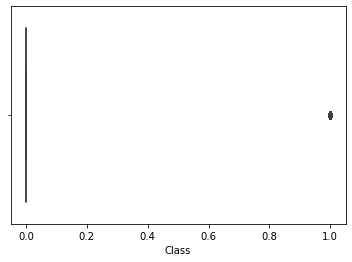

In [13]:
#Class
#the problem which i mention before is clear here
#the distribution of the values is almost on zero
sns.boxplot(Y)

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V29'>

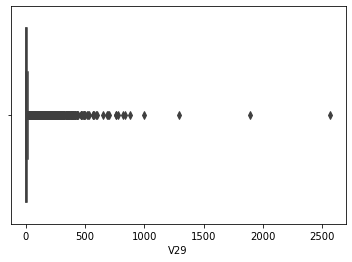

In [14]:
#V1
#the problem which i mention before is clear here
#the distribution of the values is almost on zero
sns.boxplot(X["V29"])

<AxesSubplot:>

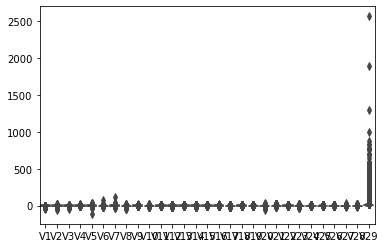

In [15]:
#creating a boxplot with all the variables because there are 29 of them and 29 boxplot it is waste of time
#this boxplot contains all 30 variables including the target variable(class)
sns.boxplot(data=X)

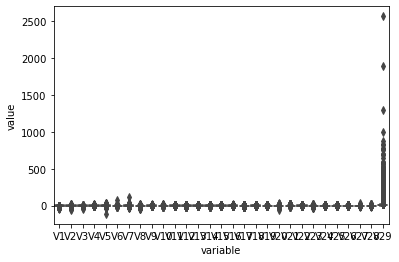

In [16]:
#create a better visualisation
#keep only the v1-v29 and exclude the class
#checking the distribution of the 29 variables
#the distribution looks normal and good
#dataset = pd.DataFrame(data = np.random.random(size=(100000,29)), 
                      # columns = ['V1','V2','V3','V4','V5','V6','V7',
                                #'V8','V9','V10','V11','V12','V13','V14',
                               # 'V15','V16','V17','V18','V19','V20','V21',
                               # 'V22','V23','V24','V25','V26','V27','V28',
                               # 'Class','V29'])

sns.boxplot(x="variable", y="value", data=pd.melt(X))

plt.show()

# Descriptive Statistics and Visualisations
In this section of the project there are the descriptive statistcs of the data.
Building basic Visualisations to understand the data distribution and the connection between them.
Creating correlation matrix to understand the correlation between the variables.

/Users/basilisgounarismpampaletsos/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


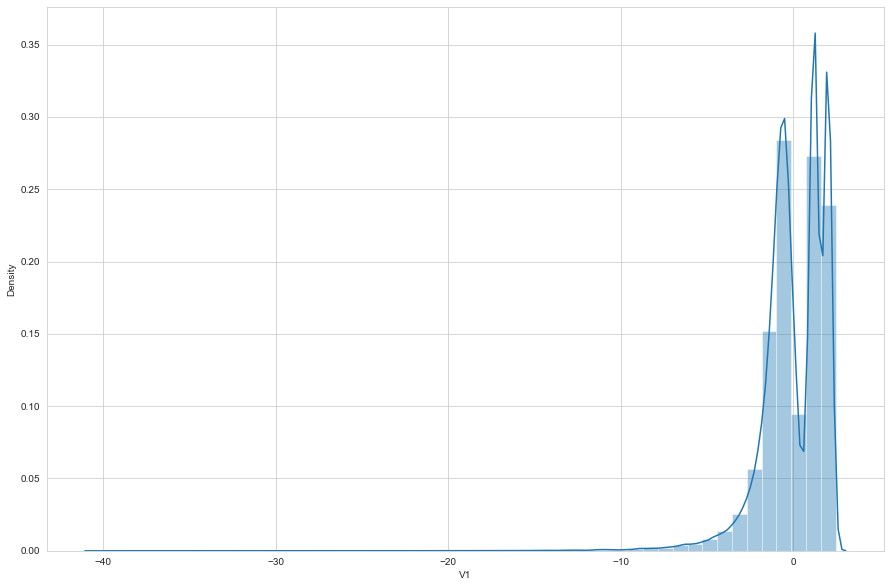

In [17]:
#testing all v1-29 in the same visulisation
#the distribution is normal and the graphs are almost the same for every variable
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(X.V1)
plt.show()

In [18]:
print(X.corr())

           V1        V2        V3        V4        V5        V6        V7  \
V1   1.000000  0.008890 -0.020517  0.001336 -0.012891 -0.005283 -0.022057   
V2   0.008890  1.000000  0.018242 -0.001948  0.011517  0.002275  0.013994   
V3  -0.020517  0.018242  1.000000  0.002454 -0.006116 -0.016181 -0.041636   
V4   0.001336 -0.001948  0.002454  1.000000  0.002757  0.000391  0.011767   
V5  -0.012891  0.011517 -0.006116  0.002757  1.000000 -0.036518 -0.072592   
V6  -0.005283  0.002275 -0.016181  0.000391 -0.036518  1.000000  0.031396   
V7  -0.022057  0.013994 -0.041636  0.011767 -0.072592  0.031396  1.000000   
V8   0.009054 -0.001886  0.012210 -0.000483  0.019737 -0.011385 -0.003992   
V9  -0.004042  0.006092 -0.001507  0.002977 -0.002652 -0.001301 -0.007269   
V10  0.000411  0.005421 -0.009155  0.002592 -0.008173 -0.002057 -0.026447   
V11  0.004013 -0.003060  0.008511 -0.003430  0.001321  0.001182  0.006579   
V12 -0.006925  0.004947 -0.009677  0.006034 -0.001911 -0.000254 -0.021106   

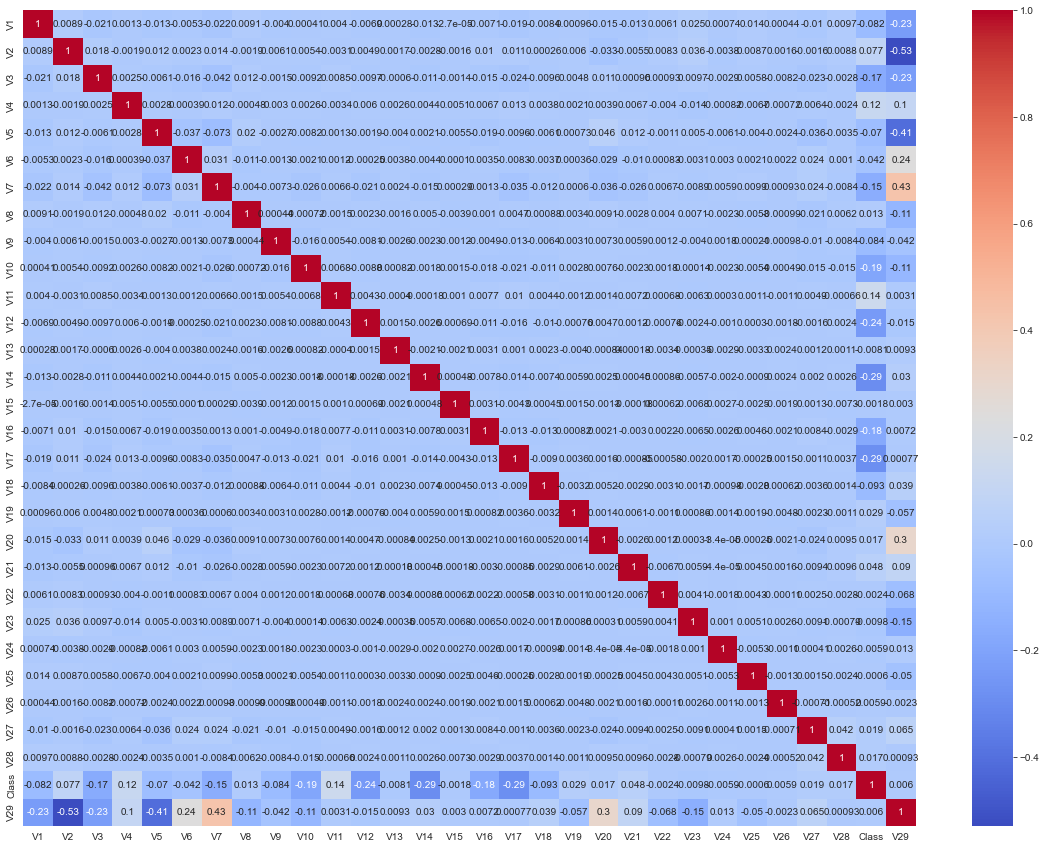

In [19]:
#creating the correlation matrix for better understanding and screening of the correlations
plt.figure(figsize=(20, 15))
correlations = dataset.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

# Data Modeling
In this stage there is the creation of the models and also the evaluation and performance checking.
After this section, we will ready to select the best model. 

In [20]:
#Split the data into training and testing set
#choosing 70-30
#70% of the dataset into training set
#30% of the dataset into testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [21]:
#checking the data
print(X_train)

             V1        V2        V3        V4        V5        V6        V7  \
42865  1.236703 -0.611102  0.036730 -1.741875 -0.350619  0.124790 -0.494004   
91446  1.986269  0.063106 -1.051288  1.482359  0.090608 -0.729863  0.233495   
66374  2.279625 -1.384225 -0.904724 -1.436088 -1.456670 -1.124453 -1.015146   
79106 -1.160055  0.910702  0.682815 -1.089713  0.558816 -0.334150  0.693113   
13404 -0.342767  1.133498  1.292043  0.061304  0.033072 -0.977326  0.721418   
...         ...       ...       ...       ...       ...       ...       ...   
21243  1.375868 -1.247300 -1.054384  1.323106 -0.342863  0.395306 -0.127390   
45891  1.250237  0.264777  0.279858  0.706598 -0.474392 -1.099027  0.014450   
42613  0.974028 -0.310169  1.071812  1.558228 -0.469827  1.146062 -0.536238   
43567  0.077285  0.974512 -0.758893  0.698830  1.322763 -0.708748  1.693657   
68268  1.151791  0.444235  0.889697  2.739001 -0.287967 -0.122166 -0.003544   

             V8        V9       V10  ...       V20 

In [22]:
#checking the data
print(Y_train)

42865    0
91446    0
66374    0
79106    0
13404    0
        ..
21243    0
45891    0
42613    0
43567    0
68268    0
Name: Class, Length: 70000, dtype: int64


In [23]:
#checking the data
print(X_test)

             V1        V2        V3        V4        V5        V6        V7  \
3582  -1.797385  1.653204  1.270036  1.419085 -0.326502 -0.435559  0.313789   
60498 -0.632955 -0.128046  0.262414 -0.742952  0.496534  0.634292  0.997197   
53227  2.055797 -0.326668 -2.752041 -0.842316  2.463072  3.173856 -0.432126   
21333  1.767167  1.008907 -1.736919  4.014406  1.519344  0.727020  0.191692   
3885   0.607461 -1.343209 -0.873857 -1.312591 -0.646286 -1.164107  0.755546   
...         ...       ...       ...       ...       ...       ...       ...   
86308  1.808827  0.054545 -2.194485  0.918804  0.401674 -1.321374  0.554371   
48870  2.124402 -0.536995 -1.240168 -0.840152 -0.375681 -0.688111 -0.581576   
34940 -0.129227  0.660383 -0.242369 -0.604895  1.100318 -0.651735  0.989824   
21964 -1.307183 -1.252015  3.197101  0.668048 -0.755765  1.641054 -1.047931   
27631 -0.422329  0.941986  1.315134 -0.192669  0.302920 -0.154236  0.581667   

             V8        V9       V10  ...       V20 

In [24]:
#checking the data
print(Y_test)

3582     0
60498    0
53227    0
21333    0
3885     0
        ..
86308    0
48870    0
34940    0
21964    0
27631    0
Name: Class, Length: 30000, dtype: int64


In [25]:
#Feature Scaling
#the v29 has sinificant larger values than the other v variables
#using scaling to improve the power of our dataset
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [26]:
print(X_train)

[[ 0.64073334 -0.37015478  0.02267657 ...  0.10288423  0.05891519
  -0.10892812]
 [ 1.03079072  0.04038298 -0.706682   ...  0.0595809  -0.1668277
  -0.30746659]
 [ 1.18344676 -0.84092377 -0.60843238 ...  0.0079179  -0.16150325
  -0.24879683]
 ...
 [ 0.50404295 -0.18691122  0.71654887 ...  0.21538066  0.07381255
  -0.12989278]
 [ 0.03739719  0.5953543  -0.51067371 ...  0.52304247  0.84641948
   0.00543879]
 [ 0.59654697  0.27245898  0.59446702 ...  0.03470349  0.06742235
  -0.31685375]]


In [27]:
print(X_test)

[[-0.93813975  1.00862254  0.84942964 ... -0.93485315 -0.41578549
  -0.20393402]
 [-0.33219581 -0.07601308  0.17396501 ... -1.92681815 -1.05987666
   0.32069097]
 [ 1.06697173 -0.19695768 -1.84679099 ...  0.07302329 -0.19032165
  -0.34266844]
 ...
 [-0.07006683  0.40407539 -0.16441913 ... -0.13959008 -0.53819776
  -0.31153436]
 [-0.68304956 -0.76041883  2.14124812 ...  0.56807507 -0.13755861
   0.16971412]
 [-0.22259084  0.57554881  0.87966095 ...  0.71257873  0.34394133
  -0.33179498]]


In [28]:
#MODEL 1 - Logistic Regression
#the basic model for classification problems
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [29]:
#predict the class
lr_pred = lr.predict(X_test)
print(lr_pred)

[0 0 0 ... 0 0 0]


In [30]:
#creating the confusion matrix
#this matrix gives us the correct prediction and the wrong prediction
#finding the accuracy of the model's prediction
cm = confusion_matrix(Y_test, lr_pred)
print(cm)
accuracy_score(Y_test, lr_pred)

[[29949     7]
 [   17    27]]


0.9992

In [31]:
#lets create a better confusion matrix with the probabilities of each answer
val = np.mat(cm) 

classnames = list(set(Y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm)

       0   1
0  29949   7
1     17  27


/var/folders/c1/cx4ljrk11rnctwvjxm_5xl6w0000gn/T/ipykernel_40536/1095455452.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]


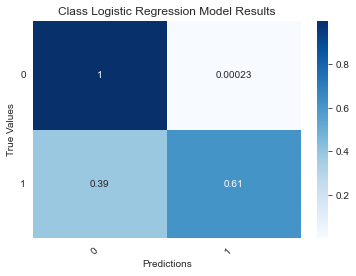

In [32]:
plt.figure()

df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]  

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True Values')

plt.xlabel('Predictions')

plt.title('Class Logistic Regression Model Results')

plt.show() 

In [33]:
#Creating the ROC and AUC to understand the predictions
#evaluate the model
#As the true positive rate approaches the 1, the better the behaviour of our ROC curve is.
y_pred_proba = lr.predict_proba(np.array(X_test))[:,1]

In [34]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

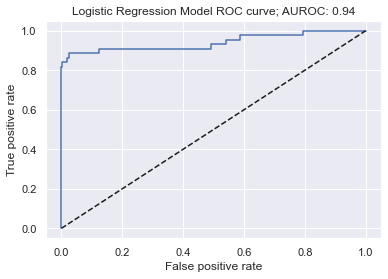

In [35]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(Y_test, y_pred_proba), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()

In [36]:
#Model 2 - Naive Bayes
nv = GaussianNB()
nv.fit(X_train, Y_train)

GaussianNB()

In [37]:
#predict the class
nv_pred = nv.predict(X_test)
print(nv_pred)

[0 0 0 ... 0 0 0]


In [38]:
#creating the confusion matrix
#finding the accuracy of the model's prediction
cm_nv = confusion_matrix(Y_test, nv_pred)
print(cm_nv)
accuracy_score(Y_test, nv_pred)

[[29204   752]
 [    8    36]]


0.9746666666666667

In [39]:
#lets create a better confusion matrix with the probabilities of each answer
val = np.mat(cm_nv) 

classnames = list(set(Y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm)

       0    1
0  29204  752
1      8   36


/var/folders/c1/cx4ljrk11rnctwvjxm_5xl6w0000gn/T/ipykernel_40536/3611027342.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]


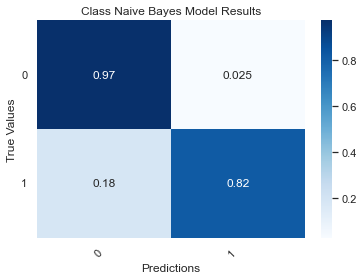

In [40]:
plt.figure()

df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]  

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True Values')

plt.xlabel('Predictions')

plt.title('Class Naive Bayes Model Results')

plt.show() 

In [41]:
#Creating the ROC and AUC to understand the predictions
y_pred_proba = nv.predict_proba(np.array(X_test))[:,1]

In [42]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

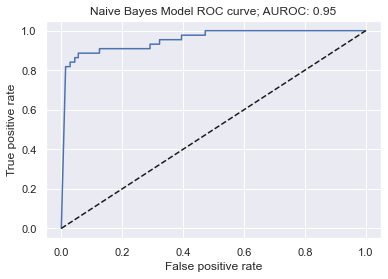

In [43]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(Y_test, y_pred_proba), 2)

plt.title(f'Naive Bayes Model ROC curve; AUROC: {AUROC}');

plt.show()

In [44]:
#MODEL 3 - Decision Tree Classification
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [45]:
dt_pred = dt.predict(X_test)
print(dt_pred)

[0 0 0 ... 0 0 0]


In [46]:
#creating the confusion matrix
#finding the accuracy of the model's prediction
cm_dt = confusion_matrix(Y_test, dt_pred)
print(cm_dt)
accuracy_score(Y_test, dt_pred)

[[29939    17]
 [   12    32]]


0.9990333333333333

In [47]:
#lets create a better confusion matrix with the probabilities of each answer
val = np.mat(cm_dt) 

classnames = list(set(Y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm)

       0   1
0  29939  17
1     12  32


/var/folders/c1/cx4ljrk11rnctwvjxm_5xl6w0000gn/T/ipykernel_40536/955511486.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]


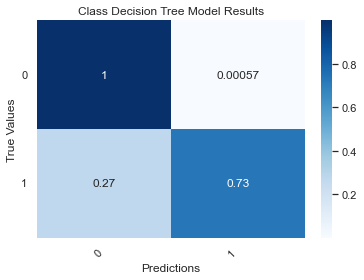

In [48]:
plt.figure()

df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]  

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True Values')

plt.xlabel('Predictions')

plt.title('Class Decision Tree Model Results')

plt.show() 

In [49]:
#Creating the ROC and AUC to understand the predictions
y_pred_proba = nv.predict_proba(np.array(X_test))[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

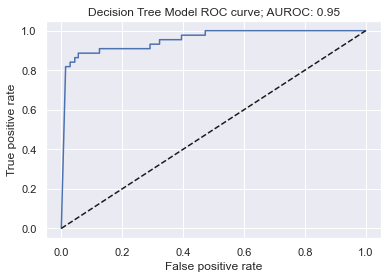

In [50]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(Y_test, y_pred_proba), 2)

plt.title(f'Decision Tree Model ROC curve; AUROC: {AUROC}');

plt.show()

In [51]:
#MODEL 4 - K_NEAREST_NEIGHBOR(KNN)
#set the no. of neighbors(how deep the algorithm to search)
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [52]:
knn_pred = knn.predict(X_test)
print(knn_pred)

[0 0 0 ... 0 0 0]


In [53]:
#creating the confusion matrix
#finding the accuracy of the model's prediction
cm_knn = confusion_matrix(Y_test, knn_pred)
print(cm_knn)
accuracy_score(Y_test, knn_pred)

[[29951     5]
 [   15    29]]


0.9993333333333333

In [54]:
#lets create a better confusion matrix with the probabilities of each answer
val = np.mat(cm_knn) 

classnames = list(set(Y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm)

       0   1
0  29951   5
1     15  29


/var/folders/c1/cx4ljrk11rnctwvjxm_5xl6w0000gn/T/ipykernel_40536/841397599.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]


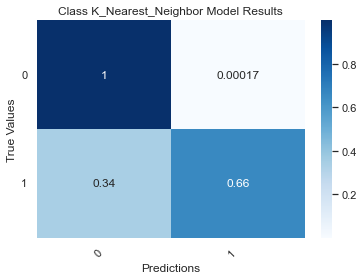

In [55]:
plt.figure()

df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]  

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True Values')

plt.xlabel('Predictions')

plt.title('Class K_Nearest_Neighbor Model Results')

plt.show() 

In [56]:
#Creating the ROC and AUC to understand the predictions
y_pred_proba = knn.predict_proba(np.array(X_test))[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

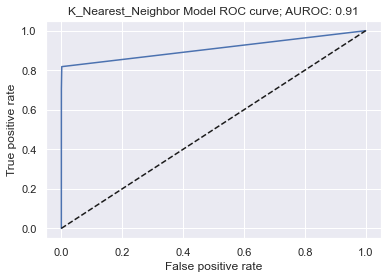

In [57]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(Y_test, y_pred_proba), 2)

plt.title(f'K_Nearest_Neighbor Model ROC curve; AUROC: {AUROC}');

plt.show()

In [58]:
#MODEL 5 - SVM Kernel
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train, Y_train)

SVC(random_state=0)

In [59]:
svm_pred = svm.predict(X_test)
print(svm_pred)

[0 0 0 ... 0 0 0]


In [60]:
#creating the confusion matrix
#finding the accuracy of the model's prediction
cm_svm = confusion_matrix(Y_test, svm_pred)
print(cm_svm)
accuracy_score(Y_test, svm_pred)

[[29954     2]
 [   25    19]]


0.9991

In [61]:
#lets create a better confusion matrix with the probabilities of each answer
val = np.mat(cm_svm) 

classnames = list(set(Y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm)

       0   1
0  29954   2
1     25  19


/var/folders/c1/cx4ljrk11rnctwvjxm_5xl6w0000gn/T/ipykernel_40536/740692353.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]


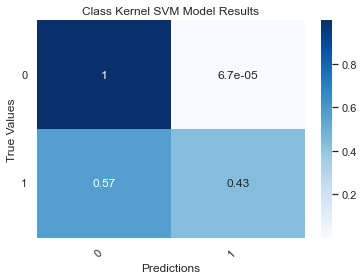

In [62]:
plt.figure()

df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]  

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True Values')

plt.xlabel('Predictions')

plt.title('Class Kernel SVM Model Results')

plt.show() 

In [63]:
#Creating the ROC and AUC to understand the predictions
y_pred_proba = svm.predict_proba(np.array(X_test))[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

AttributeError: predict_proba is not available when  probability=False

In [ ]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(Y_test, y_pred_proba), 2)

plt.title(f'SVM Kernel Model ROC curve; AUROC: {AUROC}');

plt.show()

In [ ]:
#MODEL 6 - Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, Y_train)

In [ ]:
rf_pred = rf.predict(X_test)
print(rf_pred)

In [ ]:
#creating the confusion matrix
#finding the accuracy of the model's prediction
cm_rf = confusion_matrix(Y_test, rf_pred)
print(cm_rf)
accuracy_score(Y_test, rf_pred)

In [ ]:
#lets create a better confusion matrix with the probabilities of each answer
val = np.mat(cm_rf) 

classnames = list(set(Y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm)

In [ ]:
plt.figure()

df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]  

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True Values')

plt.xlabel('Predictions')

plt.title('Class Random Forest Classifier Model Results')

plt.show() 

In [ ]:
#Creating the ROC and AUC to understand the predictions
y_pred_proba = rf.predict_proba(np.array(X_test))[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

In [ ]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(Y_test, y_pred_proba), 2)

plt.title(f'Random Forest Classifier Model ROC curve; AUROC: {AUROC}');

plt.show()

# Conclusion
The procedure to create a data analysis and models for this dataset wnet well but there is a major problem.
First of all there is not any significant correlation between our data.
The most important thing is that the most of the classes is 0 (as i found in the descriptive statistics.
This feature is very bad for predictive models because it affects the predictive value. The models learn from the answers and the answers are almost 0. For, that reason the dataset is useless. But, i create the models and i saw, once again this problem. All my models has almost perfect predictions, in real world this is impossible. I tested my models and evaluated their preformance with accuracy, confusion matrix and roc curve.

Everything goes well, but the data is not for predictions. 